In [1]:
from numpy.random import normal,multivariate_normal
import numpy as np
from numpy.linalg import inv
from numpy import genfromtxt

from scipy import *
from scipy.linalg import norm, pinv, det



import matplotlib.pyplot as plt
import numdifftools as nd

from PIL import Image
import matplotlib.image as mping

import pandas as pd


In [2]:
def kmeans(x,k):
    n = x.shape[0]
    n_iterations = 1000
    epsilon = 1e-8
    err = np.inf

    #initialize random centroids
    c = np.zeros((k,x.shape[1]))
    for i in range(k):
        idx = np.random.randint(n)
        c[i] = x[idx,:]

    for iteration in range(n_iterations):
        d = np.zeros((n, k))  # distances to centroids square
        for i in range(k):
            d[:, i] = np.sqrt(np.sum(np.square(np.subtract(x, np.tile(c[i, :], (n, 1)))), 1).flatten())

        #assign each point to nearest centroid
        l = np.argmin(d,1)


        #recompute centroids as center of mass of each cluster
        for j in range(k):
            if len(l[l==j]):
                c[j,:] = x[l==j].sum(0) / len(l[l==j])

        err_new = np.sum(np.min(d,1))/n


        if np.abs(err_new - err)<epsilon:
            break
        err = err_new

    return c,l,err    

In [3]:
#Kernel function 
def gaussianKernel(Mean, Sigma, x):
    return np.sqrt(1/(2*pi*det(Sigma))) * exp((-1/2)*dot((x-Mean).T,dot(inv(Sigma),x-Mean)))

#activation fills the Phi (in the pdf)
def activation(X, Means, Sigma):
    n = X.shape[0]
    
    # calculate activations of RBFs
    Phi = zeros((n, n), float)
    
    for i in range(n):
        for j in range(n):
            print Means[i,:]
            Phi[i,j] = gaussianKernel(Means[i,:], Sigma, X[j,:])
    return Phi


def trainRidgeRegression(X, Y, Sigma, Lambda):
    
    #Dimensions
    #X: n x Inputdimension
    #y: n x OutputDimension
    
    n = X.shape[0]
    d = X.shape[1]
    
    #Centers are the neurons in our RBF network
    
    #newCenters = kmeans(X,numNeurons)
    #centers = newCenters[0]
    
    
    #Calculate Activation matrix
   
    Phi = activation(X, X, Sigma)
    
    # calculate output weights (pseudoinverse)
    #W = dot(pinv(Phi), Y) #written by Victor
    
    W = dot(dot(inv(Lambda*np.identity(d)+dot(Phi.T, Phi)),Phi.T),Y)
 
    #Calculate the covariance matrix Q with formula (6.18) 
    
    #Q = dot(np.transpose(Y),Y) - dot(np.transpose(W), dot(np.transpose(Phi), Y)) #written by Victor
    #Q = np.zeros((d,d))
    #for i in range(n):
    #    for k in range(d):
    #        for l in range(d):
    #            Q[k,l] += (1/float(n))*(Y[i,k] - dot(Phi[i,:],W[:,k]))*(Y[i,l] - dot(Phi[i,:],W[:,k]))
        
    #Q = (1/n)*Q
    
    return W

In [4]:
#Read the data 
Xtr = genfromtxt('Xtr.csv', delimiter = ',')
d = Xtr.shape[1]

Xtr = np.delete(Xtr, (d-1), axis = 1)

Ytr = pd.read_csv('Ytr.csv')
Ytr = np.array(Ytr)
Ytr = np.delete(Ytr, (0), axis = 1)

n = Xtr.shape[0]
d = Xtr.shape[1]

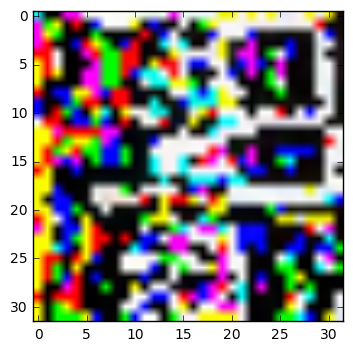

In [5]:
#The block to display images

def displayImage(image):
    plt.imshow(image)
    plt.show()

Im = Xtr[1200]

Im = np.reshape(Im,(3,32,32))
Im = Im.T
displayImage(Im)

In [6]:
Sigma = np.identity(d)

Lambda = 1
#W = trainRidgeRegression(Xtr, Ytr, Sigma, Lambda)


[ 0.00701831  0.00032327  0.00221461 ...,  0.00522321 -0.0008604
 -0.01288091]
[ 0.00701831  0.00032327  0.00221461 ...,  0.00522321 -0.0008604
 -0.01288091]
[ 0.00701831  0.00032327  0.00221461 ...,  0.00522321 -0.0008604
 -0.01288091]
[ 0.00701831  0.00032327  0.00221461 ...,  0.00522321 -0.0008604
 -0.01288091]
[ 0.00701831  0.00032327  0.00221461 ...,  0.00522321 -0.0008604
 -0.01288091]
[ 0.00701831  0.00032327  0.00221461 ...,  0.00522321 -0.0008604
 -0.01288091]
[ 0.00701831  0.00032327  0.00221461 ...,  0.00522321 -0.0008604
 -0.01288091]
[ 0.00701831  0.00032327  0.00221461 ...,  0.00522321 -0.0008604
 -0.01288091]
[ 0.00701831  0.00032327  0.00221461 ...,  0.00522321 -0.0008604
 -0.01288091]
[ 0.00701831  0.00032327  0.00221461 ...,  0.00522321 -0.0008604
 -0.01288091]
[ 0.00701831  0.00032327  0.00221461 ...,  0.00522321 -0.0008604
 -0.01288091]
[ 0.00701831  0.00032327  0.00221461 ...,  0.00522321 -0.0008604
 -0.01288091]
[ 0.00701831  0.00032327  0.00221461 ...,  0.0052232

KeyboardInterrupt: 